In [1]:
from ROOT import TFile, TVector3, TMath
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, fabs
import SimTools
from SimTools import axisEqual3D
import sys

Welcome to JupyROOT 6.18/00


# Load Raw Electron Recoil Simulation

In [2]:
#Select the gas
gas = 'he_cf4'

# Energies to calculate
Energy = 150

# Select range in cm
dist = 2.0

# Drift [cm]
drift = 25



# Path to degrad dataframe
file_path = '~/data/e_ang_res/MS_test_sims/'+gas+'/'+str(Energy)+'_keV/'+gas+'_'+str(Energy)+'keV_' + str(0) + '/'+gas+'_'+str(Energy)+'keV_' + str(0) + '.root'

# Read out the recoil tracks and corresponding time ordering
tracks,times = SimTools.read_degrad(file_path)


index = 7
track = tracks[index]
time=times[index]


/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias 

# Isolate initail part

In [3]:
track_T = track.T

x,y,z = track_T[0], track_T[1], track_T[2]
select = (x**2+y**2+z**2) < (dist**2)

x_init, y_init, z_init = x[select], y[select], z[select]
x, y, z, = x[~select], y[~select], z[~select]

# Plot the track

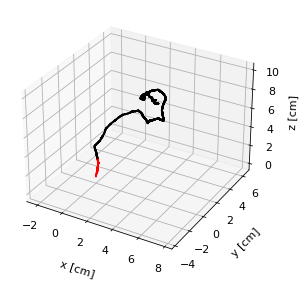

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')



ax.scatter3D(x, y, z, c='k', marker='o',s=1)
ax.scatter3D(x_init, y_init, z_init, c='r', marker='o',s=1)

ax.set_xlabel('x [cm]',fontsize=11)
ax.set_ylabel('y [cm]',fontsize=11)
ax.set_zlabel('z [cm]',fontsize=11)

ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)

ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=5

axisEqual3D(ax)
fig.set_tight_layout(True)
plt.savefig('./figures/nodiff.pdf')


# Load Diffuesed Electron Recoil Simulation

In [6]:
file_path = '~/data/e_ang_res/MS_Diff_test_sims/'+gas+'/'+str( int(drift) )+'cm_drift_'+str(Energy)+'keV.root'

tracks,times = SimTools.read_degrad(file_path)

track = tracks[index]
time = times[index]


/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias 

# Isolate initail part

In [7]:
track_T = track.T

x,y,z = track_T[0], track_T[1], track_T[2]
select = (x**2+y**2+z**2) < (dist**2)

x_init, y_init, z_init = x[select], y[select], z[select]
x, y, z, = x[~select], y[~select], z[~select]

# Plot the track

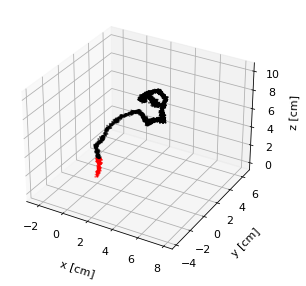

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')



ax.scatter3D(x, y, z, c='k', marker='o',s=1)
ax.scatter3D(x_init, y_init, z_init, c='r', marker='o',s=1)


ax.set_xlabel('x [cm]',fontsize=11)
ax.set_ylabel('y [cm]',fontsize=11)
ax.set_zlabel('z [cm]',fontsize=11)

ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)

ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=5

axisEqual3D(ax)
fig.set_tight_layout(True)
plt.savefig('./figures/diff.pdf')
